## Etude de la polution de l'air en fonction de données climatiques

(*Cet exemple est tiré du livre "Statistiques avec R" de Pierre-André Cornillon (Presse Universitaire de Rennes), vous pouvez y consulter une interprétation des résultats plus approfondies*).

La pollution de l'air est actuellement une des préoccupations majeures de santé publique. Des associations de surveillance de la qualité de l'air existent sur tout le territoire français et mesurent la **concentration des polluants** ainsi que **les conditions météorologiques** comme la température, la nébulosité, le vent,$\ldots$

On dispose de 112 données relevées durant l'été 2001 à Rennes stockées dans le fichier texte **"ozone.txt"** dans le répertoire **"TP/data"** du projet gitlab **CED_IntroR**.<br>

Dans ce fichier, on dispose de variables climatiques et d'une variable de pollution à l'ozone. On conservera les variables suivantes:

* **maxO3** : maximum journalier d'ozone<br>
* **T12** : température à midi<br>
* **vent** : direction du vent<br>
* **pluie** : pluie<br>
* **Vx12** : projection du vecteur vitesse du vent sur l'axe Est-Ouest

### Importation des données et premiers traitements statistiques


#### Importer les données et extraire les variables d'intérêts ("max03" ,"T12","vent","pluie","Vx12").

In [2]:
# Lecture des données

ozone <- read.csv("../data/ozone.txt",sep=" ",header=TRUE)
names(ozone)
# Extraction des données utiles
ozone <- ozone[,c("maxO3","T12","vent","pluie","Vx12")]
names(ozone)

[1] "maxO3"  "T9"     "T12"    "T15"    "Ne9"    "Ne12"   "Ne15"   "Vx9"   
 [9] "Vx12"   "Vx15"   "maxO3v" "vent"   "pluie"

[1] "maxO3" "T12"   "vent"  "pluie" "Vx12"

#### Faire un premier traitements descriptifs de ces variables.

In [3]:
# Statistiques descriptives des données de l'étude
summary(ozone)

     maxO3             T12           vent      pluie         Vx12       
 Min.   : 42.00   Min.   :14.00   Est  :10   Pluie:43   Min.   :-7.878  
 1st Qu.: 70.75   1st Qu.:18.60   Nord :31   Sec  :69   1st Qu.:-3.565  
 Median : 81.50   Median :20.55   Ouest:50              Median :-1.879  
 Mean   : 90.30   Mean   :21.53   Sud  :21              Mean   :-1.611  
 3rd Qu.:106.00   3rd Qu.:23.55                         3rd Qu.: 0.000  
 Max.   :166.00   Max.   :33.50                         Max.   : 6.578  

### Représentations graphiques
#### Analyse du lien entre deux variables par une représentation graphique.

On représente le maximum d'ozone (maxO3) en fonction de la température (T12), chaque point représente, pour un jour donné, une mesure de la température à 12h et le pic d'ozone de la journée.
- Quelle est la nature de ces deux variables.
- Afficher le graphique.
- Ajouter le label "Temperature a midi" à l'axe des x et "Pic d'ozone" pour l'axe des y.
- Redefinir l'axe des x (fonction axis) en n'affichant que les valeurs (14,18,20,22,24,28,32).

In [20]:
# Nuage de point ("maxO3","T12")
plot(ozone[,"T12"],ozone[,"maxO3"],xlab="Temperature à midi",ylab="Pic d'ozone")
# ou
# plot(ozone[,"max03"]~ozone[,"T12"])
# ou
# plot(maxO3~T12,data=ozone,pch=15,cex=0.5)
plot(maxO3~T12,data=ozone1,pch=15,cex=0.5,xaxt="n")
axis(1,at=c(14,18,20,22,24,28,32))

* Représenter le maximum d'ozone en fonction de la direction du vent<br>
- Quelle est la nature de ces deux variables.
- Afficher le graphique.
- Ajouter le label "Secteur du vent" à l'axe des x et "Pic d'ozone" pour l'axe des y.

[1] "integer"

[1] "factor"

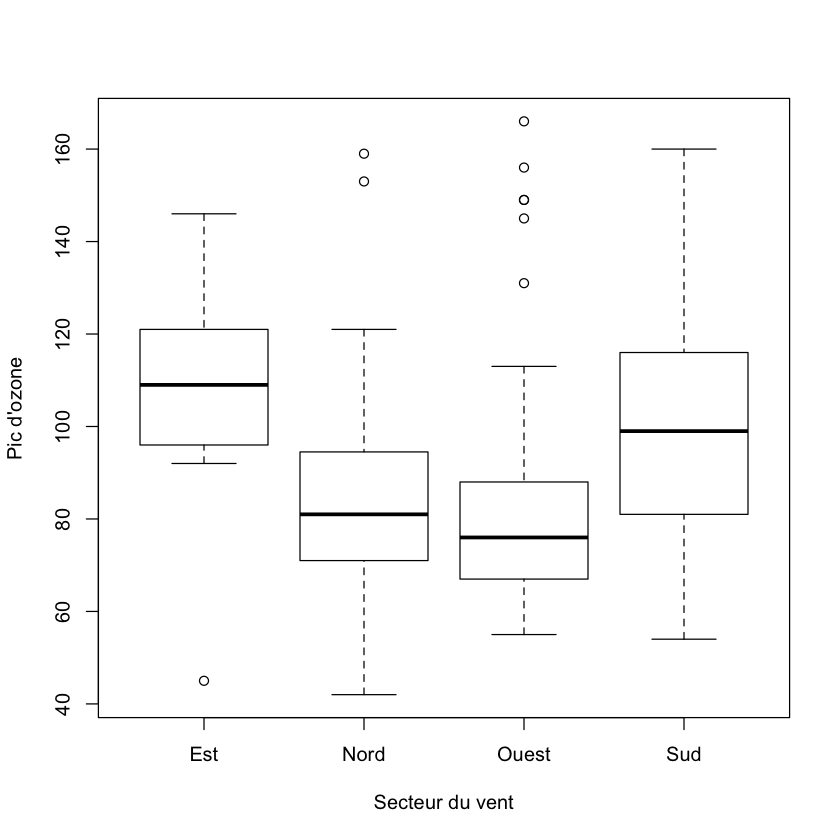

In [15]:
# Nature des variables
class(ozone$maxO3)
class(ozone$vent)
plot(maxO3~vent,data=ozone,xlab="Secteur du vent",ylab="Pic d'ozone")
# ou
# boxplot(maxO3~vent,data=ozone)

* Représenter la variable pluie en fonction de la direction du vent<br>
- Quelle est la nature de ces deux variables.
- Afficher le graphique.
- Ajouter le label "Secteur du vent" à l'axe des x et "Pluie" pour l'axe des y.

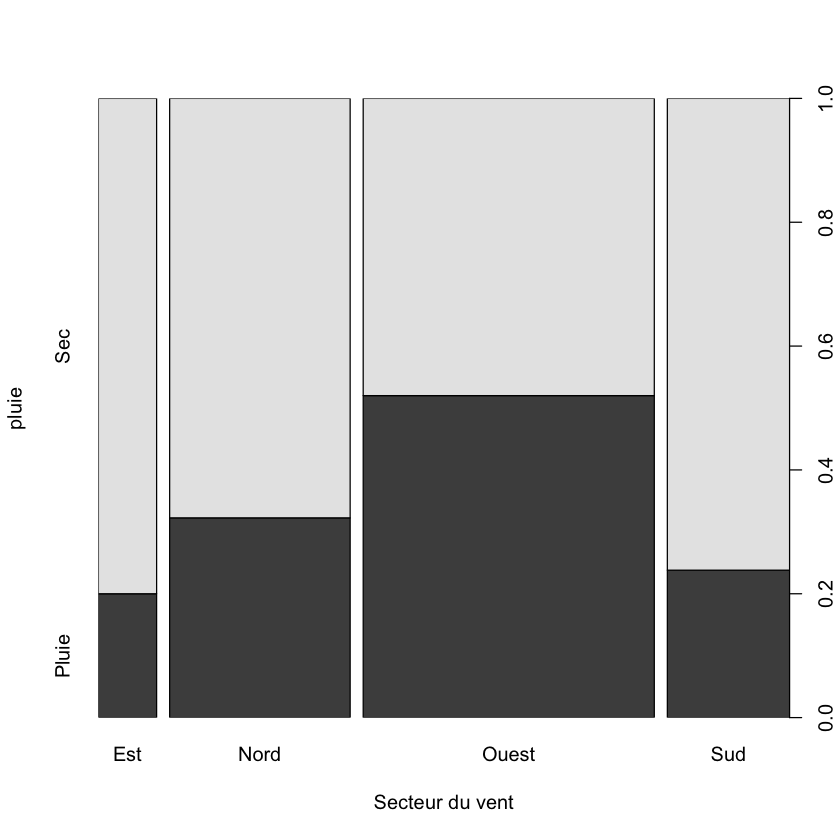

In [16]:
# pluie en fonction du vent
plot(pluie~vent,data=ozone,xlab="Secteur du vent",ylab="pluie")

* Représenter la variable vent en fonction de température<br>
- Quelle est la nature de ces deux variables.
- Afficher le graphique.
- Ajouter le label "Secteur du vent" à l'axe des y et "Temperature a midi" pour l'axe des y.

xlab="Secteur du vent",ylab="

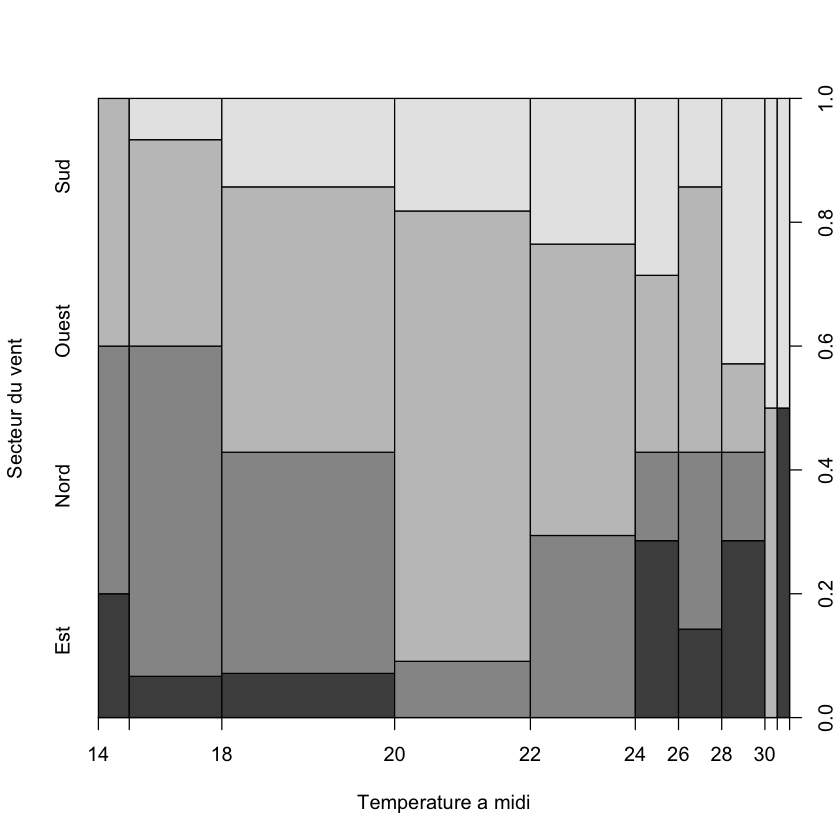

In [18]:
# vent en fonction de temperature
plot(vent~T12,data=ozone,ylab="Secteur du vent",xlab="Temperature a midi")

* Représenter l'évolution du maximum d'ozone (utiliser l'argument type="l")
- ajouter un label aux axes et un titre au graphique

In [28]:
plot(ozone[,"maxO3"],xlab="relevés",ylab="Pic d'ozone",type="l",main="Evolution du pic d'ozone")

### Relation concentration en ozone et température

Analyse de la relation entre le maximum journalier de la concentration en ozone (en $\mu/m^3$) et la température par une méthode de régression linéraire simple, fonction **lm**(linear model) de R.

#### Estimation des paramètres du modèle de régression simple.<br>

La fonction **lm** (linear model) permet d'ajuster un modèle linéaire. 

  - On observe les composantes du résultat obtenu en sortie de la fonction **lm** (fonction **names**).
  - Les fonctions **summary** et **anova** sont utilisées pour obtenir et afficher les paramètres permettant de faire une analyse des résultats.
  

In [ ]:
help(lm)

In [ ]:
reg.simple <- lm(maxO3~T12,data=ozone1)
names(reg.simple)
reg.simple$coefficients
class(reg.simple)
summary(reg.simple)

#### Tracer la droite de régression sur le nuage de point obtenue en 3.

  - en utilisant simplement la fonction **abline** sur le résultat obtenu.
  - ou la fonction **line()** sur le domaine d'observation de la variable explicative T12.

In [ ]:
# Utilisation de la fonction abline
plot(maxO3~T12,data=ozone1,pch=15,cex=0.5)
abline(reg.simple,col=2)

In [ ]:
plot(maxO3~T12,data=ozone1,pch=15,cex=0.5)
grillex <- seq(min(ozone1[,"T12"]),max(ozone1[,"T12"]),length=100)
grilley <- reg.simple$coef[1]+ reg.simple$coef[2]*grillex
lines(grillex,grilley,col=2)

#### Analyser les résidus

On peut ajouter au jeu de données initial, les valeurs ajustées, les résidus, les valeurs estimées...On pourra ensuite construire des graphes en utilisant ces nouvelles variables.

#### Estimer "maxo3" pour une nouvelle valeur de "T12"

Pour prédire "maxO3" pour une nouvelle vauleur de "T12", il suffit d'utiliser les estimations. La valeur prédite aura un intérêt si elle est donnée avec son intervalle de confiance, on utilisera de la fonction **predict** qui prend pour argument, le résultat de la régression et la ou les nouvelles valeurs sous forme d'un data-frame.

On dispose d'une nouvelle valeur de T12 égale à 19 degrés pour le $1^{er}$ octobre.

In [ ]:
xnew <- 19
xnew <- as.data.frame(xnew)
colnames(xnew) <- "T12"
predict(reg.simple,xnew, interval="pred")

Pour représenter sur un même graphe l'intervalle de confiance d'une valeur lissée et l'intervalle de confiance d'une valeur prédite, nous calculons ces intervales sur l'ensemble des points ayant servi à la construction de la droite de régression.

In [ ]:
# Données explicatives
grillex.df <- as.data.frame(grillex)
dimnames(grillex.df)[[2]] <- "T12"
ICdte <- predict(reg.simple,new=grillex.df,interval="conf",level=0.95)
ICprev <- predict(reg.simple,new=grillex.df,interval="pred",level=0.95)
plot(maxO3~T12,data=ozone1,pch=15,cex=0.5)
matlines(grillex,cbind(ICdte,ICprev),lty=c(1,2,2,3,3),col=1)
legend("topleft",lty=2:3,c("prev","conf"))

### Regression multiple

La régression linéaire multiple permet d'expliquer et/ou prédire une variable quantitative par p variables qunatitatives, c'est une généralisation du modèle de régression simple.

On revient à notre problème et on veut analyser la relation entre le maximum journalier de la concentration en ozone et la température à différentes heures de la journée, la nébulosité à différentes heures de la journée, la projection du vent sur l'axe Est-Ouest à différentes heures de la journée et la concentration maximale de la veille du jour considéré.

** Les diférentes étapes **

#### Importer les données et conserver les données utiles.

In [ ]:
# Lecture des données
names(ozone)
# Extraction des données utiles
ozone2 <- ozone[,c('maxO3','T9','T12','T15','Ne9','Ne12','Ne15','Vx9','Vx12','Vx15','maxO3v')]
names(ozone2)
summary(ozone2)

#### Représenter les variables

Pour valider les données, on effectue une analyse univariée des variables(statistiques descriptives, histogramme,...)

Le nombre de variables n'étant pas très élevé, on peut représenter les variables deux par deux sur un même graphique (fonction **pairs**). On pourrait également explorer les données avec une ACP (package FactoMineR, FactoShiny).

#### Estimer les paramètres

Pour estimer les paramètres, il faut écrire le modèle. On utilise la fonction **lm** avec une formule décrivant le modèle.<br\>

**maxO3 ~ T9+ T12+T15+Ne9+Ne12+Ne15+Vx9+Vx12+Vx15+maxO3v'** <br\>

In [ ]:
# regression multiple
reg.mul <- lm(maxO3 ~ T9+ T12+T15+Ne9+Ne12+Ne15+Vx9+Vx12+Vx15+maxO3v, data=ozone2)

In [ ]:
# OU comme ozone2 ne contient que les variables explicatives et la variable a expliquer
reg.mul <- lm(maxO3 ~ ., data=ozone2)
ls()

#### Choix des variables

Il est possible avec l'analyse de **reg.mul** de faire un choix des variables à la main. On enlève la moins significative puis on recalcule les estimations et ainsi de suite.

Il existe aussi un package R qui traite du choix des variables: le package **leaps**

In [ ]:
library("leaps", lib.loc="~/R/lib")
library("lattice")
choix <- regsubsets(maxO3 ~ ., data=ozone2, nbest=1,nvmax=11)
plot(choix)

On conserve les variables pour lesquelles le critère **"bib"** est minimum: T12, Ne9, Vx9 et max03v. D'autres critères de sélection sont disponibles.

In [ ]:
# regression après selection des variables
reg.fin <- lm(maxO3~T12+Ne9+Vx9+maxO3v,data=ozone2)
summary(reg.fin)

#### Analyser les résidus: même traitement qu'avec la régression simple

#### Prévoir une nouvelle valeur: même traitement qu'avec la régression simple

In [ ]:
# Prediction + interval de confiance
xnew <- matrix(c(19,3,30,6.5),nrow=1)
colnames(xnew) <- c("T12","Ne9","Vx9","maxO3v")
xnew <- as.data.frame(xnew)
ynew <- predict(reg.fin,xnew,interval="pred")
class(ynew)
dimnames(ynew)

### Analyse de variance à un facteur

L'analyse de variance (ou ANOVA) à 1 facteur est une méthode statistique permettant de modéliser la relation entre **une variable explicative qualitative** A et **une variable à expliquer quantitative** Y. L'objectif principal étant de comparer les moyennes empiriques de Y pour les modalités de A.

On reprend notre étude, il s'agit d'analyser la relation entre le maximum journalier de la concentration d'ozone et la direction du vent classée en secteurs (Nord, Sud,Est,Ouest). La variable **vent** du fichier **ozone** à 4 modalités.

** Les diférentes étapes **

#### Importer les données et conserver les données utiles.

In [ ]:
# Lecture des données
names(ozone)
# Extraction des données utiles
ozone3 <- ozone[,c('maxO3','vent')]
names(ozone3)
summary(ozone3)

#### Représenter les données

Avant une analyse de variance, il est usuel de représenter les boîtes à moustaches de la variable à expliquer par modalité de la variable explicative.

La direction du vent a-t-elle un effet sur la dispersion du maximum de la concentration en ozone. L'analyse de variance permettra ensuite de vérifier si un effet observé sur les statistiques descriptives et/ou les graphiques est significatif ou pas.

In [ ]:
# boxplot par modalité
plot(maxO3 ~vent, data=ozone3,pch=15,cex=0.5)

#### Analyse de la significativité du facteur

On utilise la fonction **lm** avec une formule pour estimer les paramètres du modèle. La fonction **anova** retourne le tableau d'analyse de variance.

In [ ]:
# Estimation des parametres
reg.aov1 <- lm(maxO3 ~vent,data=ozone3)

In [ ]:
# Tableau d'analyse de variance
anova(reg.aov1)

#### Analyser les résidus

Même principe que précédemment. Utiliser le package **lattice** pour représenter les résidus selon les modalités de la variable **vent**.


In [ ]:
res.aov1 <- rstudent(reg.aov1)
library(lattice)
monpanel <- function(...){
    panel.xyplot(...)
    panel.abline(h=c(-2,0,2),lty=c(3,2,3),...)
}
trellis.par.set(list(fontsize=list(point=5,text=8)))
xyplot(res.aov1~I(1:112)|vent,data=ozone3,pch="+",ylim=c(-3,3),
      panel=monpanel,ylab="Résidus",xlab="")

#### Interprétation des coefficients

Pour préciser comment la direction du vent influe sur le maximum d'ozone, on analyse les coefficients à l'aide du test de student.

In [ ]:
summary(reg.aov1)

### Analyse de variance avec interaction

C'est une méthode permettant de modéliser la relation entre **une variable quantitative** et **plusieurs variables qualitatives**.

On reprend notre étude, il s'agit d'analyser la relation entre *le maximum journalier de la concentration d'ozone* et **la direction du vent classée en secteurs** (Nord, Sud,Est,Ouest).  et **la précipitation** classée en deux modalités (Sec et Pluie).

**Les diférentes étapes**

#### Importer les données et conserver les données utiles.

In [ ]:
# Lecture des données
names(ozone)
# Extraction des données utiles
ozone4 <- ozone[,c('maxO3','vent','pluie')]
names(ozone4)
summary(ozone4)

#### Représentation des données

On représente une boîte à moustaches de la variable à expliquer par croisement des modalités des variables explicatives **vent** et **pluie** (4*2).

L'influence conjointe entre les variables **vent** et **pluie** a-t-elle un effet sur la dispersion du maximum de la concentration en ozone. 

In [ ]:
# Representation des donnees
boxplot(maxO3~vent*pluie,data=ozone4,cex=0.5)
# Interaction
par(mfrow=c(1,2))
with(ozone,interaction.plot(vent,pluie,maxO3))
with(ozone,interaction.plot(pluie,vent,maxO3))

#### Choisir le modèle - Estimation des paramètres


In [ ]:
# Choisir le modèle
mod.int <- lm(maxO3~vent*pluie,data=ozone4)
anova(mod.int)

In [ ]:
# Choisir le modèle
mod.ssint <- lm(maxO3~vent+pluie,data=ozone4)
anova(mod.ssint)

#### Interprétation des coefficients

Comme pour les méthodes précédentes, on utilisera la fonction **summary** pour aider l'interprétation.

In [ ]:
summary(mod.ssint)

Une interprétation plus approfondie serait nécessaire mais ça n'est pas le propos de ce cours.

Pour finaliser cet exercice, il serait intéressant de faire un script R sous RStudio qui exécute globalement ou par méthode l'ensemble des instructions de cette étude. Pour l'exécuter par méthod, utiliser la possibilté de fournir un argument à un script.